# Charge sinistre et loi Poisson-composée
On définit la _charge sinistre totale_ (sur une période $T$) par la variable aléatoire positive
$$
S = \sum_{i = 1}^N X_i
$$
où $N$ est une variable aléatoire à valeurs dans $\mathbf{N}$ représentant le nombre de sinistres sur la période $T$, et pour $i \ge 1$, $X_i$ est une variable aléatoire à valeurs dans $\mathbf{R}_+$ représentant le coût du i-ème sinistre, avec la convention selon laquelle la somme est nulle si $N = 0$. Les $(X_i)_{i \ge 1}$ sont supposées indépendantes et identiquement distribuées, et indépendantes de $N$ (indépendance fréquences - coûts).

Une modélisation classique est de considérer 
- $N$ de loi de Poisson de paramètre $\lambda > 0$ 
- $X_1$ de loi log-normale de paramètres $\mu > 0$, $\sigma^2 > 0$, c'est à dire $X_1 = \exp(G_1)$ avec $G_1 \sim \mathcal{N}(\mu, \sigma^2)$ <br \>
(pour la simulation on peut utiliser directement `rlnorm`).

## Calcul d'une probabilité de dépassement
Soit $\lambda = 10$, $\mu = 0.1$ et $\sigma = 0.3$. On veut calculer la probabilité que la charge sinistre totale dépasse un seuil $K$ c'est à dire 
$$
p = \mathbf{P}\bigl[S > K\bigr] \quad \text{pour $K$ grand}
$$
Pour mieux appréhender le problème on commence par représenter l'histogramme d'un échantillon de $100\,000$ réalisations de $S$ et du seuil $K$ par une ligne verticale rouge. On obtient le graphique suivant
![image](hist_S.png)
Reproduire ce graphique. La légende s'obtient par la commande
```R
abline(v = K, col = "red", lty = 1)
legend(22, 0.08, paste("seuil K = ", K), col = "red", lty = 1)
```

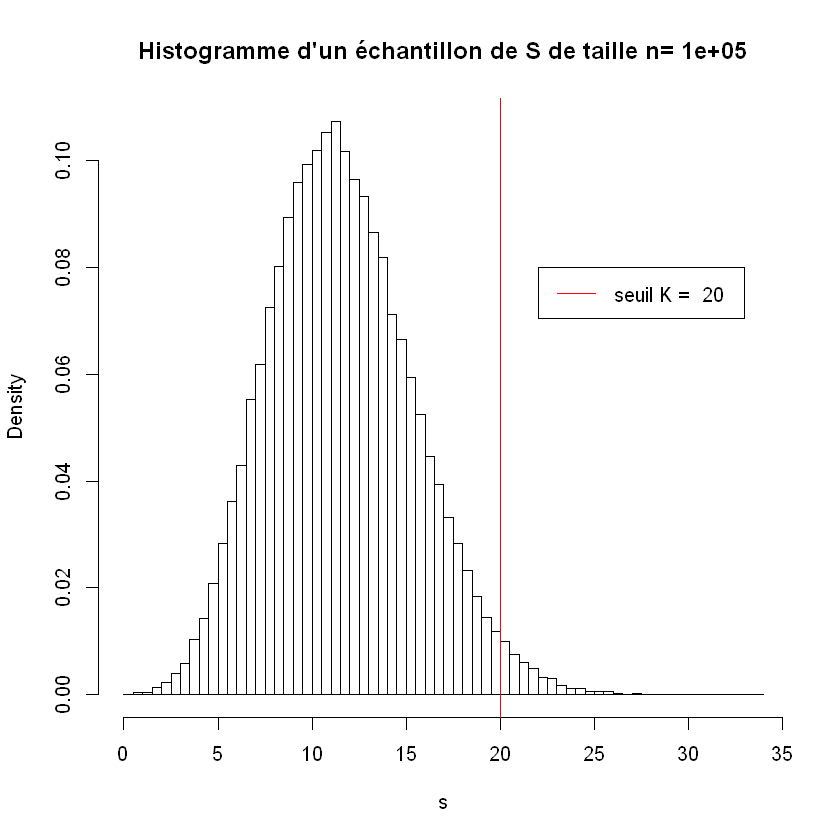

In [1]:
lambda <- 10
mu <- 0.1
sigma <- 0.3
S <- function() {
  N <- rpois(1, lambda)
  X <- rlnorm(N, mu, sigma)
  return(sum(X))
}
n <- 1e5
s <- replicate(n, S())
hist(s, breaks = 50, prob = T, main = paste("Histogramme d'un échantillon de S de taille n=", n))
K <- 20
abline(v = K, col = "red", lty = 1)
legend(22, 0.08, paste("seuil K = ", K), col = "red", lty = 1)

### Estimateur Monte Carlo respectant une erreur relative fixée
Ecrire l'estimateur Monte Carlo $p_n$ de la quantité $p$. 

- On rappelle que l'erreur absolue de l'estimateur Monte Carlo $p_n$ est définie par $|p_n - p|$ et que cette erreur est bornée par $e_n = 1.96 \frac{\sigma_n}{\sqrt{n}}$ à 95% (_i.e._ avec probabilité 0.95) avec $\sigma_n^2 = p_n - p_n^2$.

- L'erreur relative de l'estimateur Monte Carlo est définie par $\frac{|p_n - p|}{p}$ que l'on approche et que l'on borne par $\frac{e_n}{p_n}$ à 95%.

Ecrire une fonction 
```R
    erreur_relative <- function(x, K)
```
qui renvoie l'erreur relative (plus exactement la borne $\frac{e_n}{p_n}$) pour un échantillon `x` et un seuil `K`.

Tracer l'erreur relative d'un échantillon de taille $100\,000$ en fonction de $K$ pour $K$ allant de 20 à 30. Comment interpréter cette courbe ? 

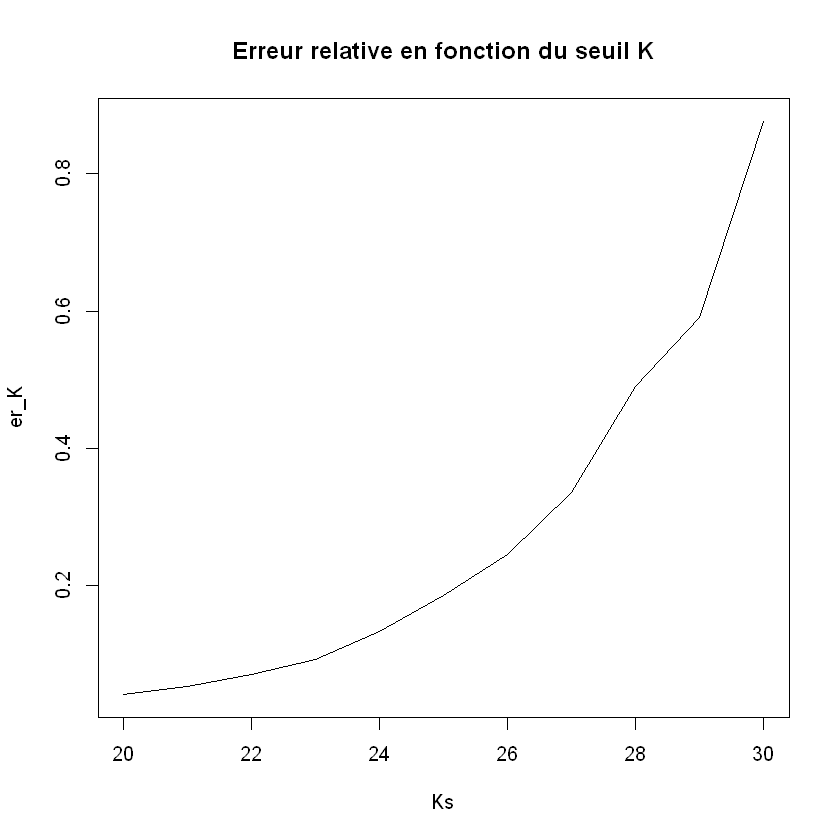

In [2]:
erreur_relative <- function(x, K) {
    p_n <- mean(x > K)
    v_n <- p_n - p_n^2
    e_n <- 1.96 * sqrt(v_n) / sqrt(length(x))
    return(e_n / p_n)
}
s <- replicate(1e5, S())
Ks <- seq(20,30,1)
er_K <- sapply(Ks, function(K) erreur_relative(s, K))
plot(Ks, er_K, t = "l", main="Erreur relative en fonction du seuil K")

Mettre en oeuvre un estimateur de Monte Carlo qui s'arrête dès que l'erreur relative est de 5%. On pourra par exemple introduire la variable aléatoire
$$
    \tau^{(m)} = \inf \bigl\{n \ge 1, e_{n m} \le 0.05 p_{n m} \bigr\},
$$
qui dépend d'un paramètre $m$ fixé, par exemple $m = 10\,000$, et renvoyer $p_{\tau^{(m)}}$ ainsi que la variance et l'intervalle de confiance associé. 
Le paramètre $m$ permet de recalculer l'estimateur et l'erreur uniquement toutes les $m$ itérations et donc de réduire la complexité par rapport au choix naïf $m = 1$. 

Le nombre d'itérations (la taille de l'échantillon) dans la méthode de Monte Carlo pour un $\tau^{(m)}$ donné est donc $\tau^{(m)} \times m$.

Voici un tableau de résultat possible lorsqu'on implémente cet estimateur de Monte Carlo adaptatif (jusqu'à l'itération $\tau^{(m)} \times m$) pour différentes valeurs de $K = 20,\dots,25$:
<table border=1>
<tr> <th>  </th> <th> 20 </th> <th> 21 </th> <th> 22 </th> <th> 23 </th> <th> 24 </th> <th> 25 </th>  </tr>
  <tr> <td align="right"> Probabilité p_n </td> <td align="right"> 0.0221429 </td> <td align="right"> 0.0126923 </td> <td align="right"> 0.00723182 </td> <td align="right"> 0.00407105 </td> <td align="right"> 0.00226471 </td> <td align="right"> 0.00121024 </td> </tr>
  <tr> <td align="right"> Erreur relative </td> <td align="right"> 0.0492298 </td> <td align="right"> 0.0479447 </td> <td align="right"> 0.0489604 </td> <td align="right"> 0.0497308 </td> <td align="right"> 0.0498888 </td> <td align="right"> 0.0499639 </td> </tr>
  <tr> <td align="right"> Itérations </td> <td align="right">   70000 </td> <td align="right">  130000 </td> <td align="right">  220000 </td> <td align="right">  380000 </td> <td align="right">  680000 </td> <td align="right"> 1.27e+06 </td> </tr>
   </table>
   
Vous pouvez aussi tracer le facteur $\tau^{(m)}$ (ou le nombre d'itérations $\tau^{(m)} \times m$) en fonction de $K$. Comment interpréter cette courbe ?

[1] 0.1316019
[1] 0.1749185
[1] 0.2196445
[1] 0.2982539
[1] 0.3766926
[1] 0.5906371


,20,21,22,23,24,25
Probabilité p_n,2.158750e-02,1.260000e-02,7.213636e-03,4.191892e-03,2.207143e-03,1.194574e-03
Erreur relative,4.665207e-02,4.812222e-02,4.902251e-02,4.966358e-02,4.980948e-02,4.989939e-02
Itération tau,8.000000e+04,1.300000e+05,2.200000e+05,3.700000e+05,7.000000e+05,1.290000e+06


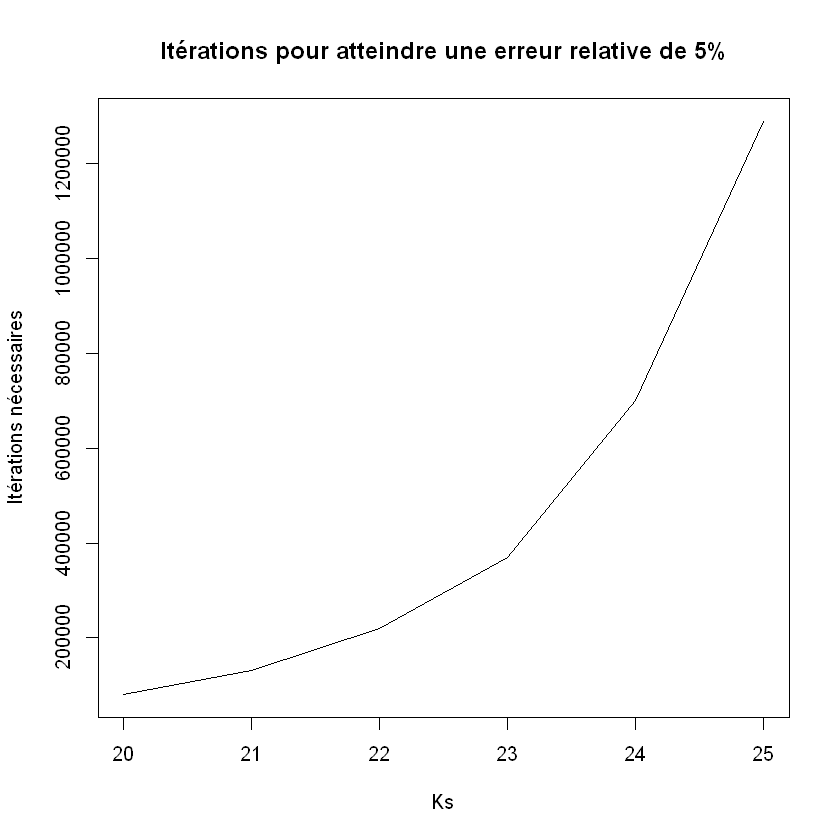

In [3]:
m <- 1e4
monte_carlo <- function(K) {
    s <- replicate(m, S())
    e_n <- erreur_relative(s, K)
    print(e_n)
    while (e_n > 0.05) {
        new_sample <- replicate(m, S())
        s <- c(s, new_sample)
        e_n <- erreur_relative(s, K)
    }
    return(c(mean(s > K), e_n, length(s)))
}

Ks <- seq(20, 25, by = 1)
MC_K <- sapply(Ks, monte_carlo)
colnames(MC_K) <- Ks
rownames(MC_K) <- c("Probabilité p_n", "Erreur relative", "Itération tau")
MC_K
plot(Ks, MC_K[3,], type = "l", ylab = "Itérations nécessaires", main = "Itérations pour atteindre une erreur relative de 5%")

## Préliminaire
Dans la suite pour comparer les différents estimateurs de Monte Carlo, on écrit la fonction suivante qui donne les informations lié à un échantillon `x`:
```R
mc_summary <- function(x) {
    m <- mean(x)
    v <- var(x)
    e <- 1.96*sqrt(v / length(x))
    return(c("Mean" = m, "Var" = v, "Erreur abs" = e, "Erreur rel" = e / m))
}
```
L'estimateur Monte Carlo standard s'écrit alors 
```R
s <- replicate(n, S())
x <- (s > K)
(r_MC <- mc_summary(x))
```

In [4]:
mc_summary <- function(x) {
    m <- mean(x)
    v <- var(x)
    e <- 1.96*sqrt(v / length(x))
    return(c("Mean" = m, "Var" = v, "Erreur abs" = e, "Erreur rel" = e / m))
}

# estimateur Monte Carlo 
K <- 22
s <- replicate(n, S())
x <- (s > K)
(r_MC <- mc_summary(x))

Mean          Var   Erreur abs   Erreur rel 
0.0073500000 0.0072960505 0.0005294196 0.0720298726

## Préconditionnement
Pour réduire la variance on teste d'abord l'idée présentée dans l'exercice 1 du TD3, c'est à dire qu'on considère la variable aléatoire 
$$
    M = \inf \bigl\{ r \ge 1, \sum_{i=1}^r X_i > K \bigr\}
$$
et la représentation suivante
$$
    p = \mathbf{E} \bigl[\phi(M) \bigr] \quad \text{avec} \quad \phi(m) = \mathbf{P} \bigl[ N \ge m \bigr]
$$
Coder une fonction `M()` qui renvoie une réalisation de la variable aléatoire $M$ et implémenter l'estimateur de $\mathbf{E} \bigl[\phi(M) \bigr]$ (avec $n = 100\,000$) en utilisant les fonctions `dpois` et `ppois` (cf. la documentation). 

Comparer les ratios de variance obtenus pour différentes valeurs de $K$ (entre 20 et 25). Pour $K = 22$ le ratio de variance est de l'ordre de 110. 

Que dire de la complexité, du temps de calcul, lorsque $K$ est grand ($K > 25$) ? Pourquoi ? 

In [5]:
K <- 22
M <- function() {
    S <- 0
    M <- 0
    repeat {  #boucle infinie
        M <- M + 1
        X <- rlnorm(1, mu, sigma)
        S <- S + X
        if (S > K) return(M)  
    }
}

n <- 1e5
# estimateur avec préconditionnement 
phi <- function(m) {
    return(dpois(m, lambda) + ppois(m, lambda, lower.tail = FALSE))

}
m <- replicate(n, M())
x <- phi(m)
(r_cond <- mc_summary(x))

# estimateur Monte Carlo 
s <- replicate(n, S())
x <- (s > K)
(r_MC <- mc_summary(x))

Mean          Var   Erreur abs   Erreur rel 
7.196359e-03 6.364780e-05 4.944789e-05 6.871238e-03

Mean         Var  Erreur abs  Erreur rel 
0.007010000 0.006960930 0.000517118 0.073768622

In [6]:
# ratio de variance 
r_MC[2] / r_cond[2]

Var 
109.3664

## Echantillonage d'importance
Pour réduire la variance sans faire exploser la complexité pour les grandes valeurs de $K$ on propose une méthode d'échantillonage d'importance (Importance Sampling) en modifiant la loi de la variable aléatoire $N$ (on peut faire un autre choix, en changeant la loi des $X_i$ ou bien en changeant la loi de $N$ et des $X_i$). Le changement de loi proposé ici repose sur le changement de probabilité, pour $\theta \in \mathbf{R}$
$$
    \frac{\mathrm{d} \mathbf{P}}{\mathrm{d} \mathbf{P}_\theta} = L_\theta \quad \text{avec} \quad L_\theta = \exp\bigl(-\theta N + \psi(\theta) \bigr),
$$
où $\psi(\theta) = \log \mathbf{E} \bigl[ \exp(\theta N) \bigr] = \lambda (e^\theta - 1)$. On vérifie par le calcul que la loi de $N$ sous $\mathbf{P}_\theta$ est la loi de Poisson de paramètre $\tilde \lambda = \lambda e^\theta$. Ainsi on a la représentation 
$$
    \mathbf{P}\biggl[ \sum_{i=1}^N X_i > K \biggr] 
    = \mathbf{E}\biggl[\mathbf{1}_{\sum_{i=1}^{\tilde N} X_i > K } 
    \bigl(\frac{\lambda}{\tilde \lambda} \bigr)^{\tilde N} 
    \exp(\tilde \lambda - \lambda)
    \biggr] \quad \text{avec $\tilde N \sim \mathcal{P}(\tilde \lambda)$}.
$$

Ecrire l'estimateur Monte Carlo basé sur cette représentation et le tester avec $K \ge 20$ et $\theta = 0.7$. 
Pour $K = 22$, le ratio de variance est de l'ordre de 17. 

Que se passe-t-il si le paramètre $\theta$ est mal choisi (prendre par exemple $\theta = 2$) ?

In [7]:
K <- 22
lambda <- 10
theta <- 0.7
lambda_tilde <- lambda * exp(theta)
SL <- function() {
    N <- rpois(1, lambda_tilde)
    X <- rlnorm(N, mu, sigma)
    L <- (lambda / lambda_tilde)^N * exp(lambda_tilde - lambda)
    if (sum(X) > K) return(L) 
    else return(0)
}

sl <- replicate(n, SL())
(r_IS <- mc_summary(sl))

Mean          Var   Erreur abs   Erreur rel 
0.0073316585 0.0004575597 0.0001325806 0.0180833014

In [8]:
r_MC["Var"] / r_IS["Var"] 

Var 
15.21316

# Calcul de sensibilités
On utilisera la notation $S^{(\lambda)}$ pour indiquer la dépendance de variable aléatoire $S = \sum_{i=1}^{N} X_i$ en le paramètre $\lambda > 0$ (paramètre de la loi de Poisson sous-jacente). On s'intéresse à la sensibilité de la probabilité $p$ en fonction de lambda c'est à dire 
$$
    \frac{\partial}{\partial \lambda} p(\lambda) = \frac{\partial}{\partial \lambda} \mathbf{P} \bigl[ S^{\lambda} > K \bigl]
$$

## Différences finies
Implémenter l'estimateur Monte Carlo basé sur les différences finies d'ordre 2 
$$
    \frac{\partial}{\partial \lambda} p(\lambda) = \frac{p(\lambda + h) - p(\lambda- h)}{2h} + \mathcal{O}(h^2)
$$
Comme vu en cours, il y a plusieurs façon d'implémenter l'estimateur Monte Carlo dans ce cadre biaisé. 

* Le premier estimateur naïf $J^{(1)}_{n,h}(\lambda)$ est basé sur des réalisations indépendantes de $S^{(\lambda+h)}$ et $S^{(\lambda-h)}$ et n'est pas efficace: la variance explose lorsque $h$ tend vers 0. Ainsi on pose
$$
    J^{(1)}_{n, h}(\lambda) = \frac{1}{2 h n} \bigl( \sum_{k = 1}^n \mathbf{1}_{\{S^{(\lambda+h)}_k > K\}} - \sum_{k = 1}^n  \mathbf{1}_{\{\tilde S^{(\lambda-h)}_k - K\}} \bigr),
$$
où $(S^{(\lambda+h)}_k)_{k \ge 1}$ et $(\tilde S^{(\lambda-h)}_k)_{k \ge 1}$ sont des suites indépendantes de variables aléatoires _i.i.d._.

* Le deuxième estimateur $J^{(2)}_{n,h}(\lambda)$ utilise des réalisations fortements corrélées de la loi de Poisson au sens suivant: on utilise la même réalisation uniforme $U$ pour constuire deux réalisations $N^{(\lambda+h)}$ et $N^{(\lambda-h)}$ en utilisant la méthode de l'inverse de la fonction de répartition (un appel de `qpois(U, lambda+h)` et `qpois(U, lambda-h)`). Dans ce deuxième estimateur, les lois log-normales sont indépendantes. On a donc
$$
    J^{(2)}_{n, h}(\lambda) = \frac{1}{2 h n} \sum_{k = 1}^n \bigl(\mathbf{1}_{\{S^{(\lambda+h)}_k > K\}} - \mathbf{1}_{\{\bar S^{(\lambda-h)}_k - K\}} \bigr),
$$
où pour $k \ge 1$, $S^{(\lambda+h)}_k = \sum_{i = 1}^{G(\lambda+h, U_k)} X_{i,k}$ et $\bar S^{(\lambda-h)}_k = \sum_{i = 1}^{G(\lambda-h, U_k)} \bar X_{i,k}$ avec $G(\lambda, u)$ l'inverse généralisée de la loi de Poisson de paramètre $\lambda$, $(U_k)_{k \ge 1}$ suite _i.i.d._ uniforme sur $[0,1]$ indépendante de $(X_{i,k})_{i\ge1, k\ge 1}$ et $(\bar X_{i,k})_{i\ge1, k\ge 1}$ deux suites (doublement indicées) _i.i.d._ de loi log-normale (de paramètres $\mu$ et $\sigma$ inchangés).


* Un troisième estimateur $J^{(3)}_{n,h}(\lambda)$ utilise des réalisations fortements corrélées de la loi de Poisson et des variables aléatoires log-normales communes. 
$$
    J^{(3)}_{n, h}(\lambda) = \frac{1}{2 h n} \sum_{k = 1}^n \bigl(\mathbf{1}_{\{S^{(\lambda+h)}_k > K\}} - \mathbf{1}_{\{S^{(\lambda-h)}_k - K\}} \bigr),
$$
où pour $k \ge 1$, $S^{(\lambda+h)}_k = \sum_{i = 1}^{G(\lambda+h, U_k)} X_{i,k}$ et $S^{(\lambda-h)}_k = \sum_{i = 1}^{G(\lambda-h, U_k)} X_{i,k}$ avec $G(\lambda, u)$ l'inverse généralisée de la loi de Poisson de paramètre $\lambda$, $(U_k)_{k \ge 1}$ suite _i.i.d._ uniforme sur $[0,1]$ indépendante de $(X_{i,k})_{i\ge1, k\ge 1}$ une suite (doublement indicée) _i.i.d._ de loi log-normale.

Programmer ces 3 estimateurs pour différentes valeurs de $h$ (de 1 à 0.001). Voici un résultat possible pour l'estimateur $J^{(3)}_{n, h}(\lambda)$:
<table border=1>
<tr> <th>  </th> <th> h =  1 </th> <th> h =  0.5 </th> <th> h =  0.1 </th> <th> h =  0.01 </th> <th> h =  0.001 </th>  </tr>
  <tr> <td align="right"> Mean </td> <td align="right"> 0.01734 </td> <td align="right"> 0.01645 </td> <td align="right"> 0.01745 </td> <td align="right">   0.018 </td> <td align="right">    0.03 </td> </tr>
  <tr> <td align="right"> Var </td> <td align="right"> 0.00836941 </td> <td align="right"> 0.0161796 </td> <td align="right"> 0.0869464 </td> <td align="right"> 0.899685 </td> <td align="right"> 14.9992 </td> </tr>
  <tr> <td align="right"> Erreur abs </td> <td align="right"> 0.000567027 </td> <td align="right"> 0.000788387 </td> <td align="right"> 0.0018276 </td> <td align="right"> 0.00587897 </td> <td align="right"> 0.0240044 </td> </tr>
  <tr> <td align="right"> Erreur rel </td> <td align="right"> 0.0327005 </td> <td align="right"> 0.0479263 </td> <td align="right"> 0.104734 </td> <td align="right"> 0.326609 </td> <td align="right"> 0.800147 </td> </tr>
   </table>
   
Que se passe-t-il lorsque $h$ tend vers 0 ? 

_Remarque_: on ne considère ici que l'étude de l'erreur statistique (absolue et relative) relative à la méthode de Monte Carlo. On ne considère pas l'erreur de biais qui décroît en lors $h$ tend vers 0 et qui est peut-être non négligeable pour $h = 1$. Les IC construits ici sont biaisés et on ne peut pas affirmer que la vraie valeur est dans l'IC à 95% (au moins pour les grandes valeurs de $h$). 

In [9]:
K <- 20
lambda0 <- 10
mu <- 0.1
sigma <- 0.3
n <- 1e5

# premier estimateur
J1 <- function(h) {
    lambda <- lambda0 + h
    s1 <- replicate(n, S())
    xph <- (s1 > K)
 
    lambda <- lambda0 - h
    s2 <- replicate(n, S())
    xmh <- (s2 > K)

    x <- (xph - xmh) / (2*h)
    return(mc_summary(x))
}
h <- c(1, 0.5, 0.1, 0.01)
res <- sapply(h, J1)
colnames(res) <- paste("h = ", h)
res

,h = 1,h = 0.5,h = 0.1,h = 0.01
Mean,0.0005950000,-0.000680000,-0.001500000,-0.0135000
Var,0.0103072490,0.040659944,1.061008360,104.7258650
Erreur abs,0.0006292561,0.001249797,0.006384332,0.0634283
Erreur rel,1.0575733308,-1.837936691,-4.256221442,-4.6983924


In [10]:
lambda <- 10
# deuxième estimateur
J2 <- function(h) {
    var_alea <- function() {
        U <- runif(1, 0, 1)
        Nmh <- qpois(U, lambda - h)
        Nph <- qpois(U, lambda + h)
        Xmh <- rlnorm(Nmh, mu, sigma)
        Xph <- rlnorm(Nph, mu, sigma)
        return(((sum(Xph) > K) - (sum(Xmh) > K)) / (2*h))
    }
    x <- replicate(n, var_alea())
    mc_summary(x)
}

h <- c(1, 0.5, 0.1, 0.01)
res <- sapply(h, J2)
colnames(res) <- paste("h = ", h)
res

,h = 1,h = 0.5,h = 0.1,h = 0.01
Mean,0.0175700000,0.0171500000,0.013150000,0.02400000
Var,0.0088763839,0.0228361059,0.449081568,44.29986700
Erreur abs,0.0005839479,0.0009366279,0.004153543,0.04125317
Erreur rel,0.0332355100,0.0546138723,0.315858766,1.71888191


In [11]:
lambda <- 10
# troisième estimateur
J3 <- function(h) {
    var_alea <- function() {
        U <- runif(1, 0, 1)
        Nmh <- qpois(U, lambda - h)
        Nph <- qpois(U, lambda + h)
        Nmin = min(Nmh, Nph)
        Xmin <- rlnorm(Nmin, mu, sigma)
        Xmh <- c(Xmin, rlnorm(max(Nmh-Nmin,0), mu, sigma))
        Xph <- c(Xmin, rlnorm(max(Nph-Nmin,0), mu, sigma))        
        return(((sum(Xph) > K) - (sum(Xmh) > K)) / (2*h))
    }
    x <- replicate(n, var_alea())
    mc_summary(x)
}

h <- c(1, 0.5, 0.1, 0.01, 0.001)
res <- sapply(h, J3)
colnames(res) <- paste("h = ", h)
res

,h = 1,h = 0.5,h = 0.1,h = 0.01,h = 0.001
Mean,0.0173400000,0.0170100000,0.017300000,0.012500000,0.01500000
Var,0.0083694081,0.0167208271,0.086201572,0.624849998,7.49985000
Erreur abs,0.0005670266,0.0008014657,0.001819758,0.004899412,0.01697393
Erreur rel,0.0327004968,0.0471173261,0.105188330,0.391952957,1.13159521
